# GRADED CHALLENGE 1

## I. Introduction

Nama: Nurrahmawati

Batch: FTDS-002

Dataset: The largest rideshare platform in the United States (Uber and Lyft)

Object: Uber-Lyft Price Prediction

Data from kaggle https://www.kaggle.com/code/ellaraesvete/uber-and-lyft-dataset-boston-ma

## II. Import Libraries

In [1]:
# Define Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# For Regression Problems
from sklearn.linear_model import LinearRegression

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder

from feature_engine.outliers import Winsorizer

# Evaluate Regression Models
from sklearn.metrics import mean_absolute_error, r2_score

# Multivariate Normality Test
from statsmodels.graphics.gofplots import qqplot

# Error and Display settings
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

## III. Data Loading

In [2]:
# Load Uber and Lyft Dataset

data_UberLyft_ori = pd.read_csv('rideshare_kaggle.csv')
data_UberLyft_ori.head(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
5,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,1.545071e+09,18,17,12,2018-12-17 18:25:12,America/New_York,Haymarket Square,North Station,Lyft,lyft_lux,Lux Black,16.5,0.44,1.0,42.2148,-71.033,38.75,33.51,Overcast,Light rain in the morning and overnight.,0.0000,0.0,0.84,7.19,8.88,1545022800,8.325,40.61,1545076800,24.07,1545130800,34.97,1545080400,12.04,1545134400,cloudy,34.41,1000.46,294,1.00,1,8.325,335.8,1545048523,1545081282,0.33,0.0221,1545066000,34.19,1545048000,40.66,1545022800,27.39,1545044400,34.97,1545080400
6,462816a3-820d-408b-8549-0b39e82f65ac,1.543209e+09,5,26,11,2018-11-26 05:03:00,America/New_York,Back Bay,Northeastern University,Lyft,lyft_plus,Lyft XL,10.5,1.08,1.0,4

In [3]:
min_date = data_UberLyft_ori['datetime'].min()
max_date = data_UberLyft_ori['datetime'].max()

print(print(f'Rentang waktu dari pengambilan data ini dimulai pada {min_date} hingga {max_date}'))

Rentang waktu dari pengambilan data ini dimulai pada 2018-11-26 03:40:46 hingga 2018-12-18 19:15:10
None


In [4]:
# Checking Basic Information

data_UberLyft_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

there are missing values ​​in the price column

In [5]:
# Check Missing Values as Percentage to Total Data

data_UberLyft_ori['price'].isnull().mean()

0.07949402009317949

the percentage of missing value in the price column is 7.9% which will be removed later in the cleaning section

In [6]:
# Checking data duplicated

data_UberLyft_ori[data_UberLyft_ori.duplicated()].shape

(0, 57)

In [7]:
# Checking Basic Statistics 

data_UberLyft_ori.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

## IV. DATA CLEANING

In [8]:
UberLyft_Clean = data_UberLyft_ori.copy()
UberLyft_Clean.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [9]:
# Percentage missing values of price column before remove it

UberLyft_Clean['price'].isnull().mean()

0.07949402009317949

In [10]:
# Remove missing values in price column
UberLyft_Clean.dropna(inplace=True)

# Percentage missing values of price column after remove it
UberLyft_Clean['price'].isnull().mean()

0.0

the percentage of data after handling missing values ​​where in the price column there are 7.9% and the missing values ​​are dropped so that now there are no missing values ​​in the data that we will use for further analysis

In [11]:
print(UberLyft_Clean.columns.tolist())

['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'short_summary', 'long_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']


In [12]:
# Checking duplicated columns between visibility and visibility.1

visibility = UberLyft_Clean[['visibility','visibility.1']].copy()

temp = []
for i in range(len(visibility)):
    if visibility.iloc[i, 0] != visibility.iloc[i, 1]:
        temp.append(False)
    else:
        temp.append(True)

pd.unique(temp)

array([ True])

based on this function, it can be seen that the column between visibility and visibility1 is the same column so we can use it for only one of these columns

In [13]:
# Remove Unnecessary Features

UberLyft_Clean.drop(['hour', 'day', 'month', 'id', 'timestamp','datetime','timezone','source','destination','product_id',
'latitude', 'longitude', 'short_summary', 'long_summary', 'windGustTime', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 
'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 
'visibility.1', 'sunriseTime', 'sunsetTime', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 
'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 
'apparentTemperatureMaxTime'], inplace=True, axis=1)

UberLyft_Clean.head()

,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax
0,Lyft,Shared,5.0,0.44,1.0,42.34,37.12,0.0000,0.0,0.68,8.66,9.17,10.000,partly-cloudy-night,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276
1,Lyft,Lux,11.0,0.44,1.0,43.58,37.35,0.1299,1.0,0.94,11.98,11.98,4.786,rain,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300
2,Lyft,Lyft,7.0,0.44,1.0,38.33,32.93,0.0000,0.0,0.75,7.33,7.33,10.000,clear-night,31.10,992.28,240,0.03,0,315.7,0.68,0.1064
3,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,29.63,0.0000,0.0,0.73,5.28,5.28,10.000,clear-night,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000
4,Lyft,Lyft XL,9.0,0.44,1.0,37.44,30.88,0.0000,0.0,0.70,9.14,9.14,10.000,partly-cloudy-night,28.61,998.36,303,0.44,0,347.7,0.72,0.0001


remove unnecessary features based on the intuition that there is a column that has the same meaning as other columns such as visibility, or that certain columns already represent those columns such as source and destination that can be represented by distance, and avoid timeseries columns for linear regression models that we will use later

In [14]:
UberLyft_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   cab_type             637976 non-null  object 
 1   name                 637976 non-null  object 
 2   price                637976 non-null  float64
 3   distance             637976 non-null  float64
 4   surge_multiplier     637976 non-null  float64
 5   temperature          637976 non-null  float64
 6   apparentTemperature  637976 non-null  float64
 7   precipIntensity      637976 non-null  float64
 8   precipProbability    637976 non-null  float64
 9   humidity             637976 non-null  float64
 10  windSpeed            637976 non-null  float64
 11  windGust             637976 non-null  float64
 12  visibility           637976 non-null  float64
 13  icon                 637976 non-null  object 
 14  dewPoint             637976 non-null  float64
 15  pressure         

In [15]:
# Splitting data into numeric columns with categorical columns

num_col = UberLyft_Clean.describe().columns.tolist()
cat_col = UberLyft_Clean.select_dtypes(include=['object']).columns.tolist()

In [16]:
# numeric overview
UberLyft_Clean[num_col].describe()

,price,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.00000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,16.545125,2.189261,1.015068,39.582406,35.87844,0.008909,0.145941,0.741056,6.186795,8.470616,8.469180,31.652281,1010.092744,220.112705,0.686291,0.249031,313.515634,0.579076,0.037369
std,9.324359,1.135413,0.095422,6.725500,7.91726,0.026880,0.328776,0.138575,3.147856,5.288683,2.601828,9.141390,13.475580,99.087172,0.358599,0.474306,27.951377,0.244674,0.055216
min,2.500000,0.020000,1.000000,18.910000,12.13000,0.000000,0.000000,0.380000,0.450000,0.800000,0.717000,4.390000,988.090000,2.000000,0.000000,0.000000,269.400000,0.090000,0.000000
25%,9.000000,1.270000,1.000000,36.450000,31.91000,0.000000,0.000000,0.640000,3.410000,4.060000,8.432000,27.490000,999.820000,124.000000,0.370000,0.000000,290.900000,0.300000,0.000000
50%,13.500000,2.160000,1.000000,40.490000,35.90000,0.000000,0.000000,0.710000,5.910000,7.550000,9.880000,30.690000,1009.250000,258.000000,0.820000,0.000000,307.400000,0.680000,0.000400
75%,22.500000,2.930000,1.000000,43.580000,40.01000,0.000000,0.000000,0.880000,8.410000,11.740000,9.996000,38.120000,1021.860000,303.000000,1.000000,0.000000,331.800000,0.790000,0.091600
max,97.500000,7.860000,3.000000,57.220000,57.22000,0.144700,1.000000,0.960000,15.000000,27.250000,10.000000,50.670000,1035.550000,356.000000,1.000000,2.000000,378.900000,0.930000,0.145900


In [17]:
# categorical overview
for i in cat_col:
    print(i)
    print()
    print(UberLyft_Clean[i].value_counts())
    print('-' * 10)

cab_type

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64
----------
name

UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: name, dtype: int64
----------
icon

 cloudy                  201429
 partly-cloudy-night     145492
 partly-cloudy-day       106337
 rain                     96170
 clear-night              55577
 clear-day                24679
 fog                       8292
Name: icon, dtype: int64
----------


In [18]:
UberLyft_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   cab_type             637976 non-null  object 
 1   name                 637976 non-null  object 
 2   price                637976 non-null  float64
 3   distance             637976 non-null  float64
 4   surge_multiplier     637976 non-null  float64
 5   temperature          637976 non-null  float64
 6   apparentTemperature  637976 non-null  float64
 7   precipIntensity      637976 non-null  float64
 8   precipProbability    637976 non-null  float64
 9   humidity             637976 non-null  float64
 10  windSpeed            637976 non-null  float64
 11  windGust             637976 non-null  float64
 12  visibility           637976 non-null  float64
 13  icon                 637976 non-null  object 
 14  dewPoint             637976 non-null  float64
 15  pressure         

After handling missing values ​​and dropping unnecessary features, the data for further analysis will be 637976 rows and 22 columns

## V. EDA for Analysis Purpose

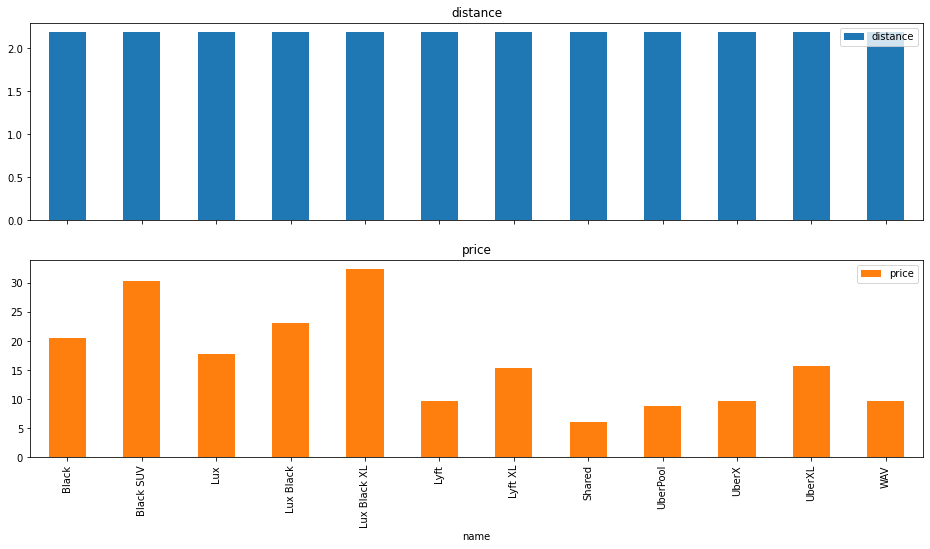

In [19]:
UberLyft_Clean.groupby('name')['distance', 'price'].mean().plot(kind= 'bar', subplots=True, figsize=(16, 8));

Based on the visualization above, the average delivery distance and cost rates for each type of uber and lyft. We can see that the average delivery distance for each type of uber and lyft looks the same or there is no difference between each type, while for the average cost, the highest cost is in the Lux Black XL type and the lowest is the Shared type.

<AxesSubplot:xlabel='cab_type'>

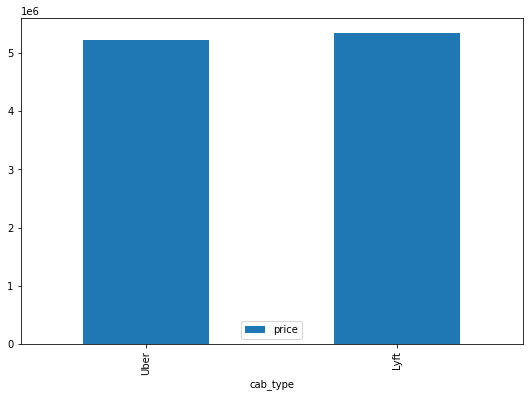

In [20]:
UberLyft_Clean.groupby('cab_type')[['price']].sum().sort_values('price').plot(kind='bar', figsize=(9,6))

We can see for the difference of the total fee fare between uber and lyft, Lyft has a higher total fee fare compared to Uber

## VI. Split data into Train and Test

In [21]:
inference = UberLyft_Clean.sample(3, random_state=5)
UberLyft_Clean = UberLyft_Clean.drop(inference.index)
UberLyft_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637973 entries, 0 to 693070
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   cab_type             637973 non-null  object 
 1   name                 637973 non-null  object 
 2   price                637973 non-null  float64
 3   distance             637973 non-null  float64
 4   surge_multiplier     637973 non-null  float64
 5   temperature          637973 non-null  float64
 6   apparentTemperature  637973 non-null  float64
 7   precipIntensity      637973 non-null  float64
 8   precipProbability    637973 non-null  float64
 9   humidity             637973 non-null  float64
 10  windSpeed            637973 non-null  float64
 11  windGust             637973 non-null  float64
 12  visibility           637973 non-null  float64
 13  icon                 637973 non-null  object 
 14  dewPoint             637973 non-null  float64
 15  pressure         

Separate samples before splitting for later model inference

In [22]:
# define feature and target
X = UberLyft_Clean.drop('price', axis=1)
y = UberLyft_Clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Determine between feature and target. it can be seen in this case that the target is in the price column and we can set it as the y variable, while in addition to the price column we can set it to the x variable.

In [23]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(446581, 21)
(191392, 21)
(446581,)
(191392,)


See the shape between X and Y of each train and test. This means that the data distribution is 70% for the train data and 30% for the test data from the cleaned data (`UberLyft_Clean`) so that the train has a shape of 446581 rows and the test has 191392 rows.

In [24]:
# for EDA model creation, use dataframe stored in Uber_Lyft
Uber_Lyft = pd.concat([X_train, y_train], axis=1)

Uber_Lyft.shape

(446581, 22)

Merge from X and Y that we have separated, but which are merged only for train data only. The data for testing is different when the preprocessing data is from the train data

## VII. EDA FOR MODELING

In [25]:
Uber_Lyft.head()

,cab_type,name,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
253060,Uber,UberXL,1.41,1.0,46.78,46.78,0.0,0.0,0.96,2.99,2.99,3.036,cloudy,45.78,1002.75,317,1.00,0,288.3,0.86,0.0903,16.0
27359,Uber,WAV,4.48,1.0,35.95,31.19,0.0,0.0,0.69,5.66,6.86,10.000,clear-night,26.76,1012.75,325,0.02,0,294.2,0.75,0.0000,17.0
241426,Uber,Black,2.58,1.0,38.96,33.83,0.0,0.0,0.70,7.11,11.22,9.955,cloudy,29.98,1000.88,294,0.92,0,376.8,0.33,0.0177,21.0
571212,Lyft,Lux,4.27,1.0,46.66,44.16,0.0,0.0,0.91,5.21,7.94,10.000,partly-cloudy-night,44.19,1022.09,226,0.87,0,297.5,0.27,0.0075,26.0
424614,Uber,Black,2.62,1.0,35.54,30.98,0.0,0.0,0.73,5.31,7.20,9.933,partly-cloudy-night,27.87,991.07,270,0.76,0,345.8,0.72,0.0000,19.5


In [26]:
# get name columns for data type numeric and categoric
num_col = Uber_Lyft.select_dtypes(exclude=['object']).columns.tolist()
cat_col = Uber_Lyft.select_dtypes(include=['object']).columns.tolist()

In [27]:
Uber_Lyft[num_col].shape

(446581, 19)

We separate first for numeric data with categorical data, for numeric data there are 446581 rows with 19 columns

### **numerical feature**

In [28]:
Uber_Lyft[num_col].head()

,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
253060,1.41,1.0,46.78,46.78,0.0,0.0,0.96,2.99,2.99,3.036,45.78,1002.75,317,1.00,0,288.3,0.86,0.0903,16.0
27359,4.48,1.0,35.95,31.19,0.0,0.0,0.69,5.66,6.86,10.000,26.76,1012.75,325,0.02,0,294.2,0.75,0.0000,17.0
241426,2.58,1.0,38.96,33.83,0.0,0.0,0.70,7.11,11.22,9.955,29.98,1000.88,294,0.92,0,376.8,0.33,0.0177,21.0
571212,4.27,1.0,46.66,44.16,0.0,0.0,0.91,5.21,7.94,10.000,44.19,1022.09,226,0.87,0,297.5,0.27,0.0075,26.0
424614,2.62,1.0,35.54,30.98,0.0,0.0,0.73,5.31,7.20,9.933,27.87,991.07,270,0.76,0,345.8,0.72,0.0000,19.5


In [29]:
def plot_dist(Uber_Lyft, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))

# histogram
    sns.histplot(Uber_Lyft[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(Uber_Lyft[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(Uber_Lyft[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=Uber_Lyft[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()

# skewness
    print(Uber_Lyft[col].name + ' Kurtosis: ' + str(Uber_Lyft[col].kurt()))
    print(Uber_Lyft[col].name + ' Skewness: ' + str(Uber_Lyft[col].skew()))
    if -0.5 <= Uber_Lyft[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif Uber_Lyft[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif Uber_Lyft[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

Create a function to determine the distribution and skew detection of each column in numeric data

#### Distance

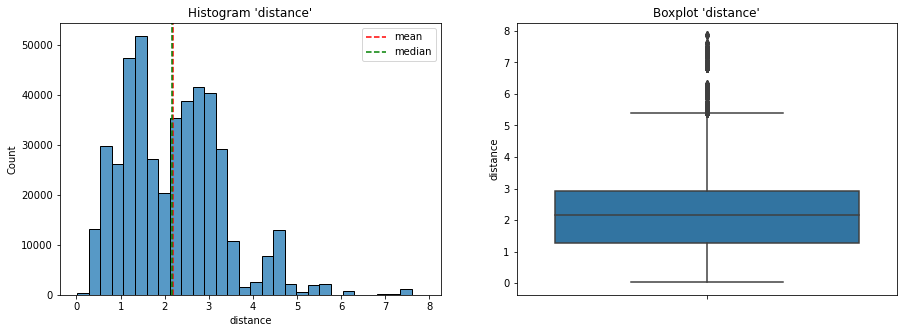

distance Kurtosis: 1.1585466023026583
distance Skewness: 0.8171434569365136
Columns 'distance' right skewed


In [30]:
# checking the distribution of distance
plot_dist(Uber_Lyft, 'distance')

In [31]:
# outlier detection using IQR 
Q3 = Uber_Lyft['distance'].quantile(.75)
Q1 = Uber_Lyft['distance'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = Uber_Lyft[(Uber_Lyft['distance'] > upper) | (Uber_Lyft['distance'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/Uber_Lyft.shape[0] * 100, '%')

count of outlier:  5057
percentage of outlier:  1.132381359708541 %


In [32]:
# capping outlier
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['distance'])

Uber_Lyft_Cleaned = wins.fit_transform(Uber_Lyft)

#### surge_multiplier

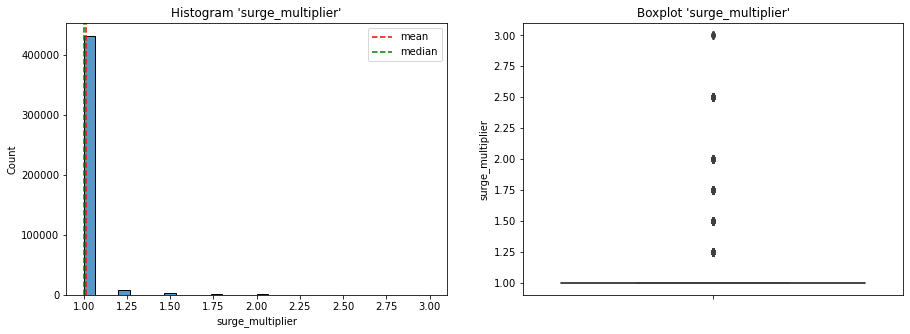

surge_multiplier Kurtosis: 73.08544289830812
surge_multiplier Skewness: 7.940223582824733
Columns 'surge_multiplier' right skewed


In [33]:
# checking the distribution of surge_multiplier
plot_dist(Uber_Lyft_Cleaned, 'surge_multiplier')

In [34]:
# outlier detection using IQR 
Q3 = Uber_Lyft_Cleaned['surge_multiplier'].quantile(.75)
Q1 = Uber_Lyft_Cleaned['surge_multiplier'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (3 * IQR)
lower = Q1 - (3 * IQR)

outlier = Uber_Lyft_Cleaned[(Uber_Lyft_Cleaned['surge_multiplier'] > upper) | (Uber_Lyft_Cleaned['surge_multiplier'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/Uber_Lyft_Cleaned.shape[0] * 100, '%')

count of outlier:  14712
percentage of outlier:  3.2943631726383344 %


In [35]:
# capping outlier
wins = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=['surge_multiplier'])

Uber_Lyft_Cleaned = wins.fit_transform(Uber_Lyft_Cleaned)

#### temperature

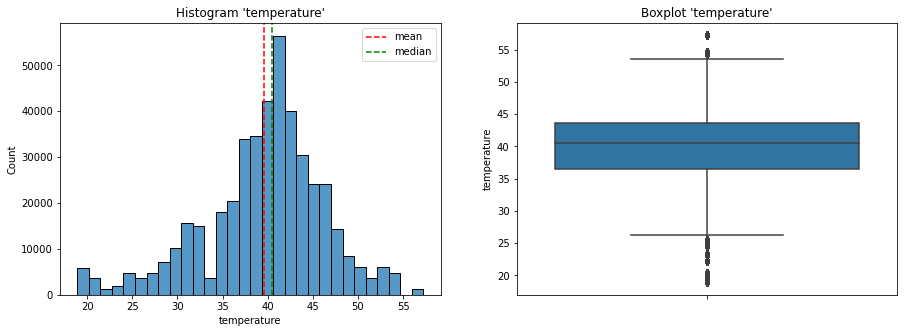

temperature Kurtosis: 0.763204128771847
temperature Skewness: -0.608270830384796
Columns 'temperature' left skewed


In [36]:
# checking the distribution of temperatur
plot_dist(Uber_Lyft_Cleaned, 'temperature')

In [37]:
# outlier detection using IQR 
Q3 = Uber_Lyft_Cleaned['temperature'].quantile(.75)
Q1 = Uber_Lyft_Cleaned['temperature'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = Uber_Lyft_Cleaned[(Uber_Lyft_Cleaned['temperature'] > upper) | (Uber_Lyft_Cleaned['temperature'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/Uber_Lyft_Cleaned.shape[0] * 100, '%')

count of outlier:  23339
percentage of outlier:  5.226151582803568 %


In [38]:
# capping outlier
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['temperature'])

Uber_Lyft_Cleaned = wins.fit_transform(Uber_Lyft_Cleaned)

#### apparentTemperature

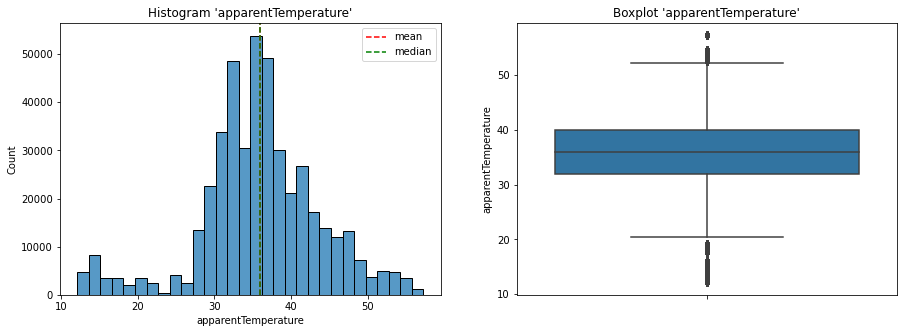

apparentTemperature Kurtosis: 1.1439419619990843
apparentTemperature Skewness: -0.39194632654358885
Columns 'apparentTemperature' normal distribution


In [39]:
# checking the distribution of apparentTemperature
plot_dist(Uber_Lyft_Cleaned, 'apparentTemperature')

In [40]:
# outlier detection for normal distribution
outliers_L = (Uber_Lyft_Cleaned.apparentTemperature.mean()) - (3 * (Uber_Lyft_Cleaned.apparentTemperature.std()))
outliers_R = (Uber_Lyft_Cleaned.apparentTemperature.mean()) + (3 * (Uber_Lyft_Cleaned.apparentTemperature.std()))

outlier = Uber_Lyft_Cleaned[(Uber_Lyft_Cleaned['apparentTemperature'] > outliers_R) | (Uber_Lyft_Cleaned['apparentTemperature'] < outliers_L)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/Uber_Lyft_Cleaned.shape[0] * 100, '%')

count of outlier:  1185
percentage of outlier:  0.2653493991011709 %


In [41]:
# capping outlier
wins = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=['apparentTemperature'])

Uber_Lyft_Cleaned = wins.fit_transform(Uber_Lyft_Cleaned)

#### precipIntensity

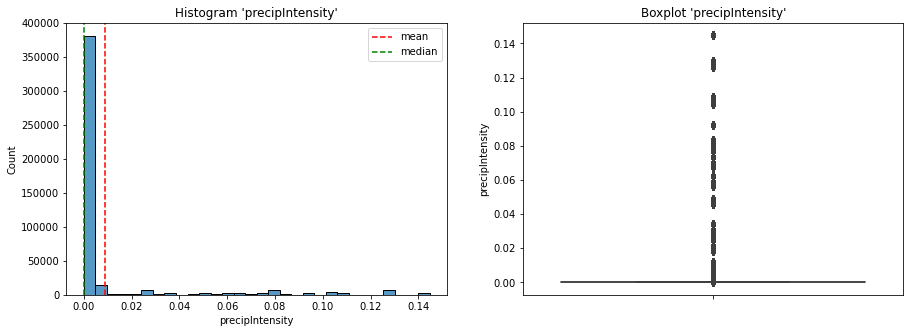

precipIntensity Kurtosis: 10.408835381918866
precipIntensity Skewness: 3.330063710169177
Columns 'precipIntensity' right skewed


In [42]:
# # checking the distribution of precipIntensity
plot_dist(Uber_Lyft_Cleaned, 'precipIntensity')

In [43]:
# outlier detection using IQR 
Q3 = Uber_Lyft_Cleaned['precipIntensity'].quantile(.75)
Q1 = Uber_Lyft_Cleaned['precipIntensity'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (3 * IQR)
lower = Q1 - (3 * IQR)

outlier = Uber_Lyft_Cleaned[(Uber_Lyft_Cleaned['precipIntensity'] > upper) | (Uber_Lyft_Cleaned['precipIntensity'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/Uber_Lyft_Cleaned.shape[0] * 100, '%')

count of outlier:  96967
percentage of outlier:  21.71319424695632 %


In [44]:
# capping outlier
wins = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=['precipIntensity'])

Uber_Lyft_Cleaned = wins.fit_transform(Uber_Lyft_Cleaned)

#### precipProbability

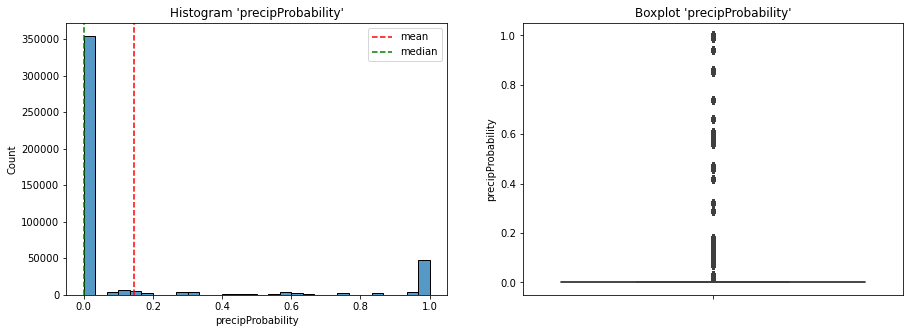

precipProbability Kurtosis: 2.35314816170233
precipProbability Skewness: 2.0320759182159964
Columns 'precipProbability' right skewed


In [45]:
# checking the distribution of precipProbability
plot_dist(Uber_Lyft_Cleaned, 'precipProbability')

In [46]:
# outlier detection using IQR 
Q3 = Uber_Lyft_Cleaned['precipProbability'].quantile(.75)
Q1 = Uber_Lyft_Cleaned['precipProbability'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (3 * IQR)
lower = Q1 - (3 * IQR)

outlier = Uber_Lyft_Cleaned[(Uber_Lyft_Cleaned['precipProbability'] > upper) | (Uber_Lyft_Cleaned['precipProbability'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/Uber_Lyft_Cleaned.shape[0] * 100, '%')

count of outlier:  96967
percentage of outlier:  21.71319424695632 %


In [47]:
# capping outlier
wins = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=['precipProbability'])

Uber_Lyft_Cleaned = wins.fit_transform(Uber_Lyft_Cleaned)

#### humidity

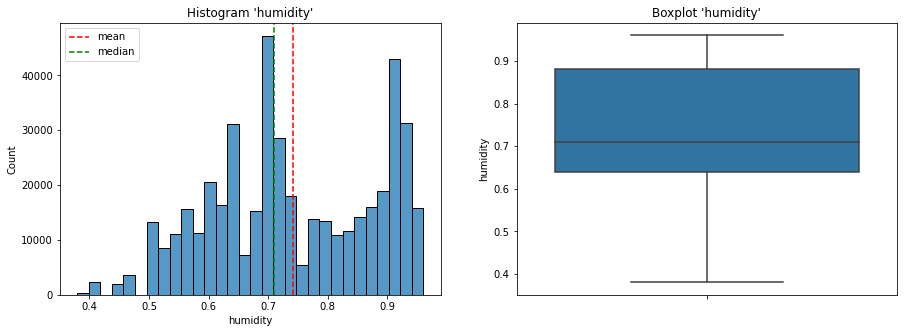

humidity Kurtosis: -1.0282746113132177
humidity Skewness: -0.07469795962135703
Columns 'humidity' normal distribution


In [48]:
# checking the distribution of humidity
plot_dist(Uber_Lyft_Cleaned, 'humidity')

In [49]:
# outlier detection for normal distribution
outliers_L = (Uber_Lyft_Cleaned.humidity.mean()) - (3 * (Uber_Lyft_Cleaned.humidity.std()))
outliers_R = (Uber_Lyft_Cleaned.humidity.mean()) + (3 * (Uber_Lyft_Cleaned.humidity.std()))

outlier = Uber_Lyft_Cleaned[(Uber_Lyft_Cleaned['humidity'] > outliers_R) | (Uber_Lyft_Cleaned['humidity'] < outliers_L)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/Uber_Lyft_Cleaned.shape[0] * 100, '%')

count of outlier:  0
percentage of outlier:  0.0 %


#### windSpeed

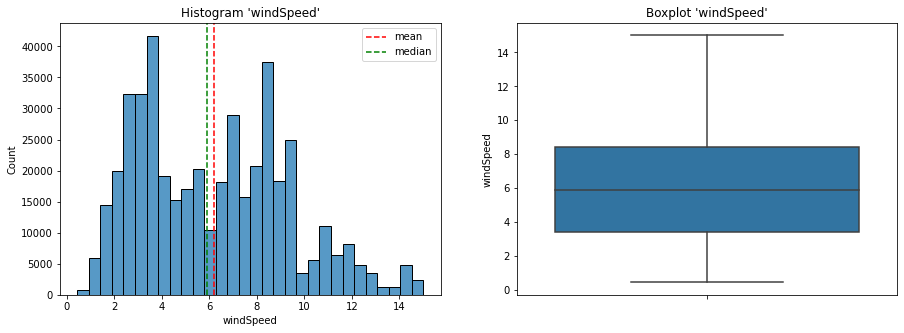

windSpeed Kurtosis: -0.56052772968658
windSpeed Skewness: 0.45066087456252396
Columns 'windSpeed' normal distribution


In [50]:
# checking the distribution of windSpeed
plot_dist(Uber_Lyft_Cleaned, 'windSpeed')

In [51]:
# outlier detection for normal distribution
outliers_L = (Uber_Lyft_Cleaned.windSpeed.mean()) - (3 * (Uber_Lyft_Cleaned.windSpeed.std()))
outliers_R = (Uber_Lyft_Cleaned.windSpeed.mean()) + (3 * (Uber_Lyft_Cleaned.windSpeed.std()))

outlier = Uber_Lyft_Cleaned[(Uber_Lyft_Cleaned['windSpeed'] > outliers_R) | (Uber_Lyft_Cleaned['windSpeed'] < outliers_L)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/Uber_Lyft_Cleaned.shape[0] * 100, '%')

count of outlier:  0
percentage of outlier:  0.0 %


#### windGust

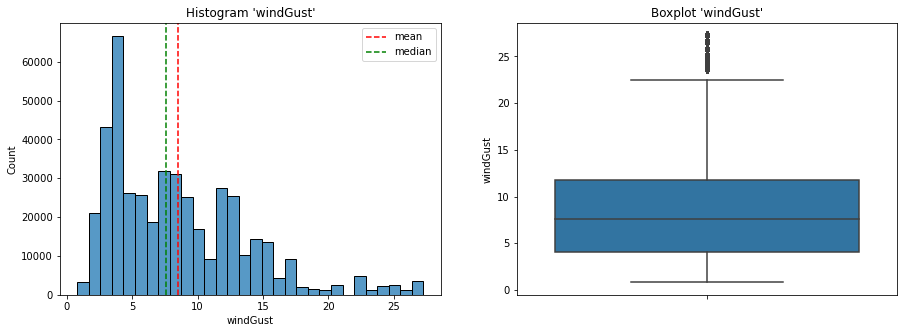

windGust Kurtosis: 1.1594254604014966
windGust Skewness: 1.118854447908997
Columns 'windGust' right skewed


In [52]:
# checking the distribution of windGust
plot_dist(Uber_Lyft_Cleaned, 'windGust')

In [53]:
# outlier detection using IQR 
Q3 = Uber_Lyft_Cleaned['windGust'].quantile(.75)
Q1 = Uber_Lyft_Cleaned['windGust'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (3 * IQR)
lower = Q1 - (3 * IQR)

outlier = Uber_Lyft_Cleaned[(Uber_Lyft_Cleaned['windGust'] > upper) | (Uber_Lyft_Cleaned['windGust'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/Uber_Lyft_Cleaned.shape[0] * 100, '%')

count of outlier:  0
percentage of outlier:  0.0 %


In [54]:
# capping outlier
wins = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=['windGust'])

Uber_Lyft_Cleaned = wins.fit_transform(Uber_Lyft_Cleaned)

#### visibility

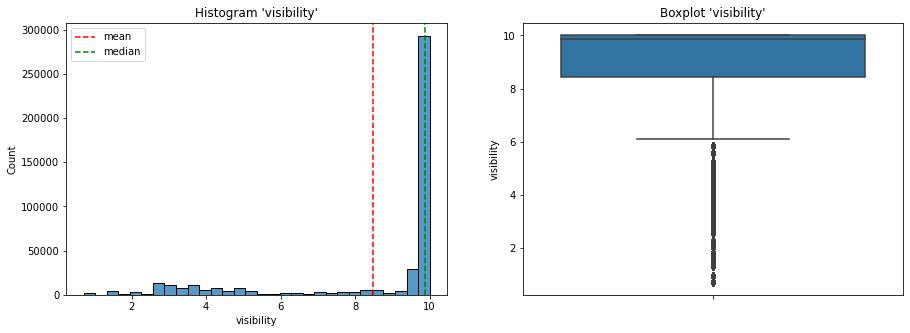

visibility Kurtosis: 0.6438751573087615
visibility Skewness: -1.50912530059879
Columns 'visibility' left skewed


In [55]:
# checking the distribution of visibility
plot_dist(Uber_Lyft_Cleaned, 'visibility')

In [56]:
# outlier detection using IQR 
Q3 = Uber_Lyft_Cleaned['visibility'].quantile(.75)
Q1 = Uber_Lyft_Cleaned['visibility'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (3 * IQR)
lower = Q1 - (3 * IQR)

outlier = Uber_Lyft_Cleaned[(Uber_Lyft_Cleaned['visibility'] > upper) | (Uber_Lyft_Cleaned['visibility'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/Uber_Lyft_Cleaned.shape[0] * 100, '%')

count of outlier:  53630
percentage of outlier:  12.009019640334003 %


In [57]:
# capping outlier
wins = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=['visibility'])

Uber_Lyft_Cleaned = wins.fit_transform(Uber_Lyft_Cleaned)

#### dewPoint

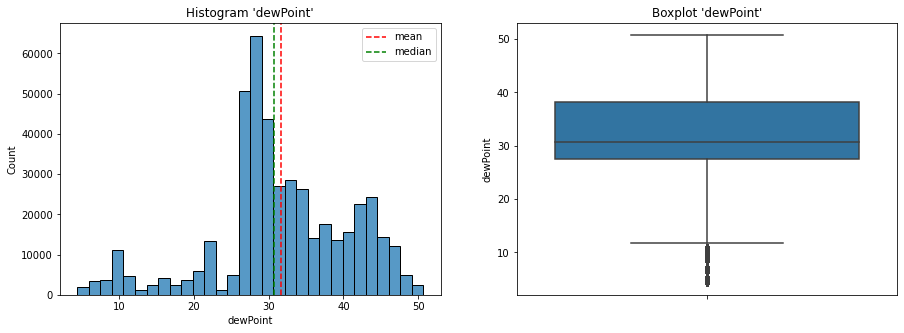

dewPoint Kurtosis: 0.4331085786152702
dewPoint Skewness: -0.49411402767142637
Columns 'dewPoint' normal distribution


In [58]:
# checking the distribution of dewPoint
plot_dist(Uber_Lyft_Cleaned, 'dewPoint')

In [59]:
# outlier detection for normal distribution
outliers_L = (Uber_Lyft_Cleaned.dewPoint.mean()) - (3 * (Uber_Lyft_Cleaned.dewPoint.std()))
outliers_R = (Uber_Lyft_Cleaned.dewPoint.mean()) + (3 * (Uber_Lyft_Cleaned.dewPoint.std()))

outlier = Uber_Lyft_Cleaned[(Uber_Lyft_Cleaned['dewPoint'] > outliers_R) | (Uber_Lyft_Cleaned['dewPoint'] < outliers_L)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/Uber_Lyft_Cleaned.shape[0] * 100, '%')

count of outlier:  0
percentage of outlier:  0.0 %


In [60]:
# capping outlier
wins = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=['dewPoint'])

Uber_Lyft_Cleaned = wins.fit_transform(Uber_Lyft_Cleaned)

#### pressure

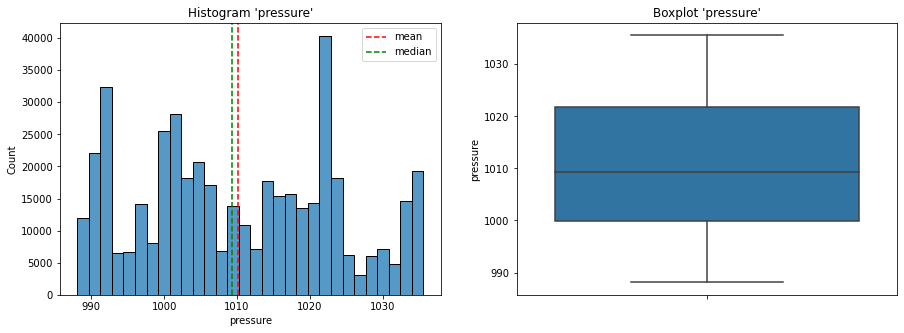

pressure Kurtosis: -1.0847408560681076
pressure Skewness: 0.1537046499596205
Columns 'pressure' normal distribution


In [61]:
# checking the distribution of pressure
plot_dist(Uber_Lyft_Cleaned, 'pressure')

In [62]:
# outlier detection for normal distribution
outliers_L = (Uber_Lyft_Cleaned.pressure.mean()) - (3 * (Uber_Lyft_Cleaned.pressure.std()))
outliers_R = (Uber_Lyft_Cleaned.pressure.mean()) + (3 * (Uber_Lyft_Cleaned.pressure.std()))

outlier = Uber_Lyft_Cleaned[(Uber_Lyft_Cleaned['pressure'] > outliers_R) | (Uber_Lyft_Cleaned['pressure'] < outliers_L)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/Uber_Lyft_Cleaned.shape[0] * 100, '%')

count of outlier:  0
percentage of outlier:  0.0 %


#### windBearing

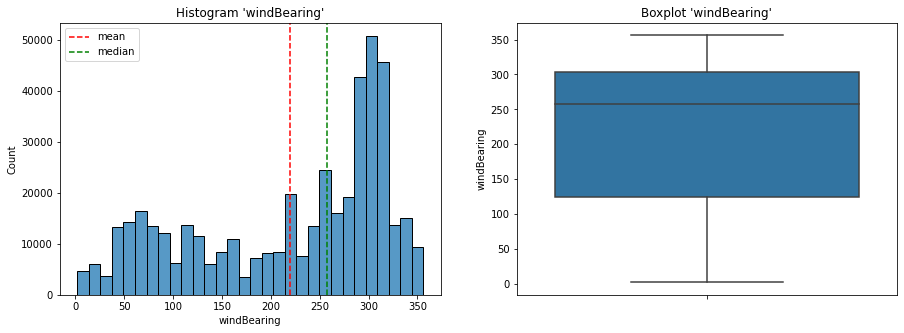

windBearing Kurtosis: -1.0289863552715648
windBearing Skewness: -0.6252460320538444
Columns 'windBearing' left skewed


In [63]:
# checking the distribution of windBearing
plot_dist(Uber_Lyft_Cleaned, 'windBearing')

In [64]:
# outlier detection using IQR 
Q3 = Uber_Lyft_Cleaned['windBearing'].quantile(.75)
Q1 = Uber_Lyft_Cleaned['windBearing'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = Uber_Lyft_Cleaned[(Uber_Lyft_Cleaned['windBearing'] > upper) | (Uber_Lyft_Cleaned['windBearing'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/Uber_Lyft_Cleaned.shape[0] * 100, '%')

count of outlier:  0
percentage of outlier:  0.0 %


#### cloudCover

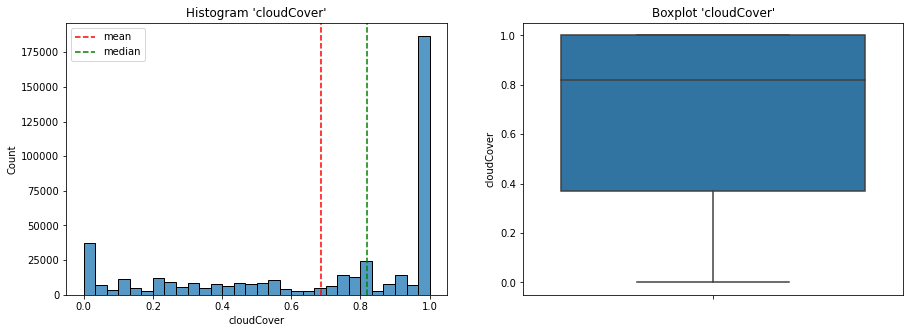

cloudCover Kurtosis: -1.0015658420357938
cloudCover Skewness: -0.7312704321729641
Columns 'cloudCover' left skewed


In [65]:
# checking the distribution of cloudCover
plot_dist(Uber_Lyft_Cleaned, 'cloudCover')

In [66]:
# outlier detection using IQR 
Q3 = Uber_Lyft_Cleaned['cloudCover'].quantile(.75)
Q1 = Uber_Lyft_Cleaned['cloudCover'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = Uber_Lyft_Cleaned[(Uber_Lyft_Cleaned['cloudCover'] > upper) | (Uber_Lyft_Cleaned['cloudCover'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/Uber_Lyft_Cleaned.shape[0] * 100, '%')

count of outlier:  0
percentage of outlier:  0.0 %


#### uvIndex

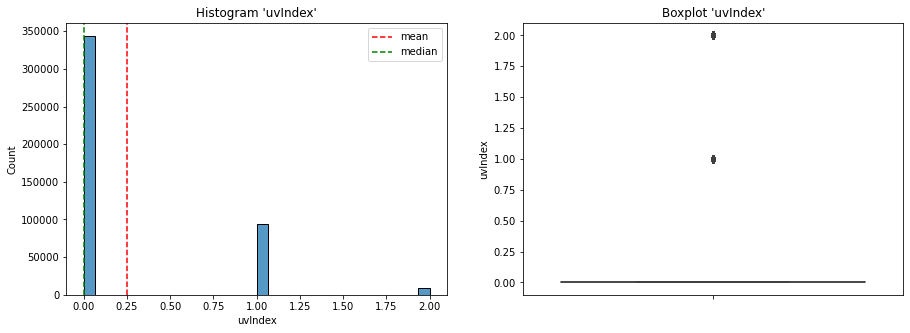

uvIndex Kurtosis: 1.8990124232999324
uvIndex Skewness: 1.6784821081348031
Columns 'uvIndex' right skewed


In [67]:
# checking the distribution of uvIndex
plot_dist(Uber_Lyft_Cleaned, 'uvIndex')

In [68]:
# outlier detection using IQR 
Q3 = Uber_Lyft_Cleaned['uvIndex'].quantile(.75)
Q1 = Uber_Lyft_Cleaned['uvIndex'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (3 * IQR)
lower = Q1 - (3 * IQR)

outlier = Uber_Lyft_Cleaned[(Uber_Lyft_Cleaned['uvIndex'] > upper) | (Uber_Lyft_Cleaned['uvIndex'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/Uber_Lyft_Cleaned.shape[0] * 100, '%')

count of outlier:  102844
percentage of outlier:  23.029192912371997 %


In [69]:
# capping outlier
wins = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=['uvIndex'])

Uber_Lyft_Cleaned = wins.fit_transform(Uber_Lyft_Cleaned)

#### ozone

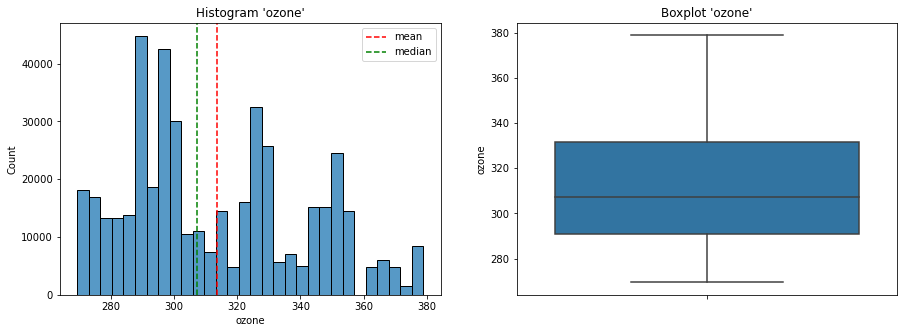

ozone Kurtosis: -0.8646493988380533
ozone Skewness: 0.4155806235100066
Columns 'ozone' normal distribution


In [70]:
# checking the distribution of ozone
plot_dist(Uber_Lyft_Cleaned, 'ozone')

In [71]:
# outlier detection for normal distribution
outliers_L = (Uber_Lyft_Cleaned.ozone.mean()) - (3 * (Uber_Lyft_Cleaned.ozone.std()))
outliers_R = (Uber_Lyft_Cleaned.ozone.mean()) + (3 * (Uber_Lyft_Cleaned.ozone.std()))

outlier = Uber_Lyft_Cleaned[(Uber_Lyft_Cleaned['ozone'] > outliers_R) | (Uber_Lyft_Cleaned['ozone'] < outliers_L)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/Uber_Lyft_Cleaned.shape[0] * 100, '%')

count of outlier:  0
percentage of outlier:  0.0 %


#### moonPhase

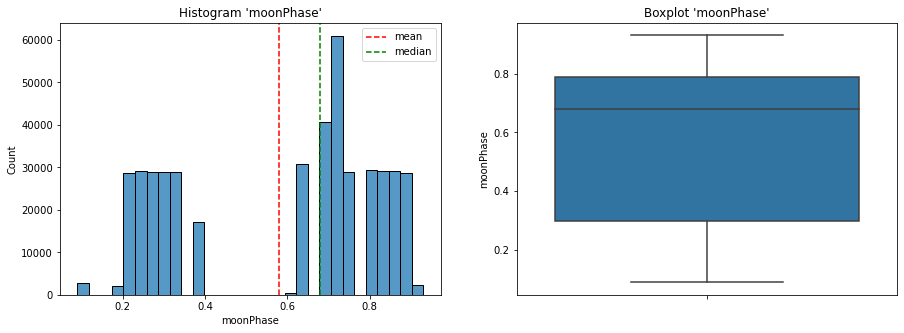

moonPhase Kurtosis: -1.49411279753107
moonPhase Skewness: -0.3816577374024019
Columns 'moonPhase' normal distribution


In [72]:
# checking the distribution of moonPhase
plot_dist(Uber_Lyft_Cleaned, 'moonPhase')

In [73]:
# outlier detection for normal distribution
outliers_L = (Uber_Lyft_Cleaned.moonPhase.mean()) - (3 * (Uber_Lyft_Cleaned.moonPhase.std()))
outliers_R = (Uber_Lyft_Cleaned.moonPhase.mean()) + (3 * (Uber_Lyft_Cleaned.moonPhase.std()))

outlier = Uber_Lyft_Cleaned[(Uber_Lyft_Cleaned['moonPhase'] > outliers_R) | (Uber_Lyft_Cleaned['moonPhase'] < outliers_L)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/Uber_Lyft_Cleaned.shape[0] * 100, '%')

count of outlier:  0
percentage of outlier:  0.0 %


#### precipIntensityMax

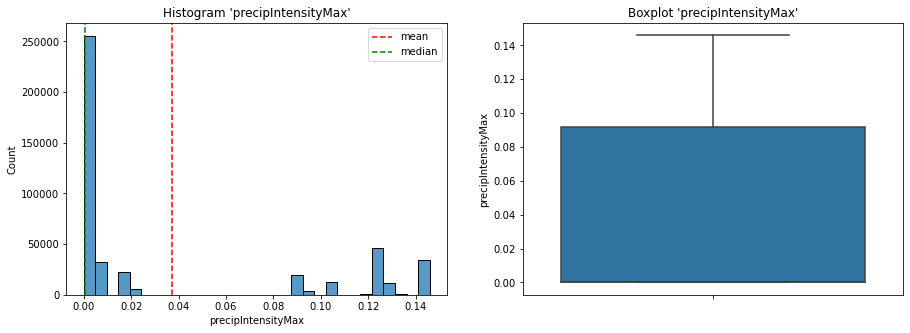

precipIntensityMax Kurtosis: -0.8721089050649051
precipIntensityMax Skewness: 0.9920703797361569
Columns 'precipIntensityMax' right skewed


In [74]:
# checking the distribution of precipIntensityMax
plot_dist(Uber_Lyft_Cleaned, 'precipIntensityMax')

In [75]:
# outlier detection using IQR 
Q3 = Uber_Lyft_Cleaned['precipIntensityMax'].quantile(.75)
Q1 = Uber_Lyft_Cleaned['precipIntensityMax'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = Uber_Lyft_Cleaned[(Uber_Lyft_Cleaned['precipIntensityMax'] > upper) | (Uber_Lyft_Cleaned['precipIntensityMax'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/Uber_Lyft_Cleaned.shape[0] * 100, '%')

count of outlier:  0
percentage of outlier:  0.0 %


In [76]:
# capping outlier
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['precipIntensityMax'])

Uber_Lyft_Cleaned = wins.fit_transform(Uber_Lyft_Cleaned)

In [77]:
# Compare before and after outlier handling
print('before handling: \n', Uber_Lyft[num_col].describe())

print('after handling: \n', Uber_Lyft_Cleaned[num_col].describe())

before handling: 
             distance  surge_multiplier    temperature  apparentTemperature  \
count  446581.000000     446581.000000  446581.000000        446581.000000   
mean        2.191388          1.015118      39.587664            35.887751   
std         1.135808          0.095579       6.713051             7.900696   
min         0.020000          1.000000      18.910000            12.130000   
25%         1.280000          1.000000      36.500000            31.910000   
50%         2.160000          1.000000      40.490000            35.900000   
75%         2.930000          1.000000      43.580000            40.010000   
max         7.860000          3.000000      57.220000            57.220000   

       precipIntensity  precipProbability       humidity      windSpeed  \
count    446581.000000      446581.000000  446581.000000  446581.000000   
mean          0.008894           0.145690       0.741204       6.182408   
std           0.026853           0.328542       0.138

Based on the analysis above, this explains the difference in the data between the outliers before handling and those already in the handling. In this case, the handling method used is the Gaussian capping method or IQR according to the distribution of each of the columns

#### Feature Selection for Numerical Features using Heatmap Correlation

In [78]:
numerik = Uber_Lyft_Cleaned[num_col]
numerik.head()

,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
253060,1.41,1.0,46.78,46.78,0.0,0.0,0.96,2.99,2.99,3.036,45.78,1002.75,317,1.00,0.0,288.3,0.86,0.0903,16.0
27359,4.48,1.0,35.95,31.19,0.0,0.0,0.69,5.66,6.86,10.000,26.76,1012.75,325,0.02,0.0,294.2,0.75,0.0000,17.0
241426,2.58,1.0,38.96,33.83,0.0,0.0,0.70,7.11,11.22,9.955,29.98,1000.88,294,0.92,0.0,376.8,0.33,0.0177,21.0
571212,4.27,1.0,46.66,44.16,0.0,0.0,0.91,5.21,7.94,10.000,44.19,1022.09,226,0.87,0.0,297.5,0.27,0.0075,26.0
424614,2.62,1.0,35.54,30.98,0.0,0.0,0.73,5.31,7.20,9.933,27.87,991.07,270,0.76,0.0,345.8,0.72,0.0000,19.5


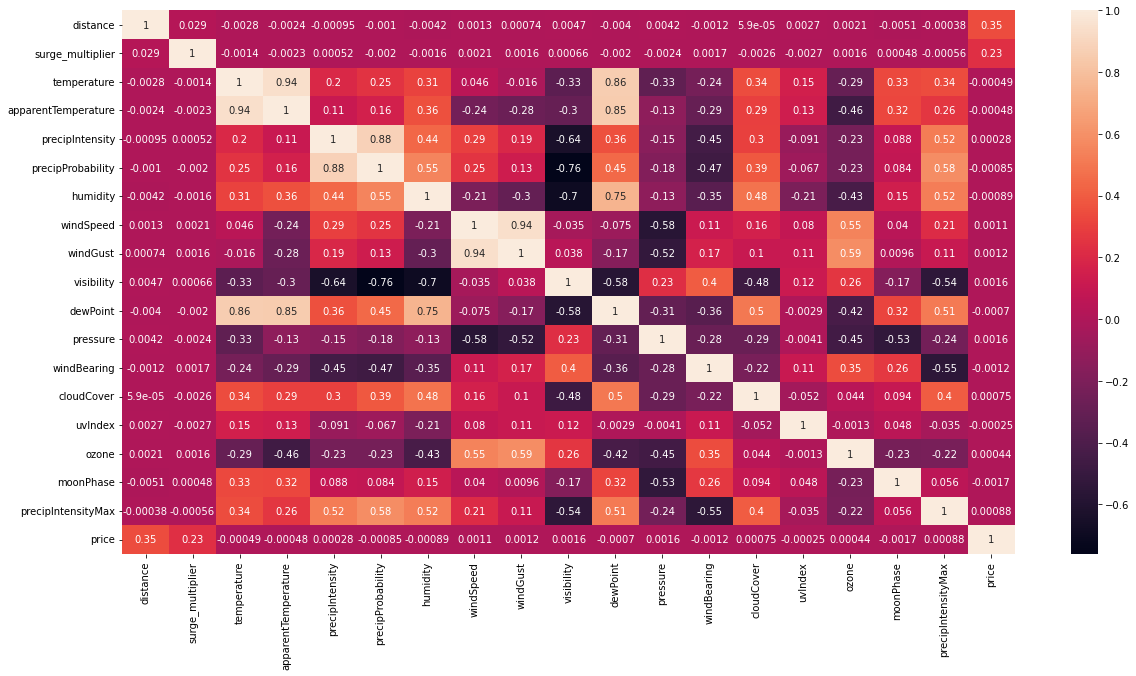

In [79]:
fig,ax = plt.subplots(figsize=[20,10])

corr = numerik.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

Based on the correlation between the numeric data columns, we can see that for values ​​close to 1 or -1, there is a high correlation between these columns. In this case, the target that has been determined is the price column, so we will focus on features that have a high correlation with price, namely there are only two columns (`distance` and `surge_multiplier`) which are closely related to price compared to other features. , so we will take those two columns and drop other features from numeric data

In [80]:
numerik = numerik[['distance','surge_multiplier','price']]
numerik.head()


,distance,surge_multiplier,price
253060,1.41,1.0,16.0
27359,4.48,1.0,17.0
241426,2.58,1.0,21.0
571212,4.27,1.0,26.0
424614,2.62,1.0,19.5


In [81]:
Uber_Lyft_Cleaned = Uber_Lyft_Cleaned.drop(['temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity',
                                            'windSpeed', 'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
                                            'cloudCover', 'uvIndex', 'ozone', 'moonPhase', 'precipIntensityMax'], axis = 1)

Uber_Lyft_Cleaned.shape

(446581, 6)

In [82]:
Uber_Lyft_Cleaned.head()

,cab_type,name,distance,surge_multiplier,icon,price
253060,Uber,UberXL,1.41,1.0,cloudy,16.0
27359,Uber,WAV,4.48,1.0,clear-night,17.0
241426,Uber,Black,2.58,1.0,cloudy,21.0
571212,Lyft,Lux,4.27,1.0,partly-cloudy-night,26.0
424614,Uber,Black,2.62,1.0,partly-cloudy-night,19.5


### **categorical features**

After we have selected the numerical data features, then we will also perform the feature selection for categorical data but there will be stages with numerical data.

In [83]:
# save in UberLyft_cat process as temporary variable
UberLyft_cat = Uber_Lyft_Cleaned[cat_col + ['price']]

UberLyft_cat.head()

,cab_type,name,icon,price
253060,Uber,UberXL,cloudy,16.0
27359,Uber,WAV,clear-night,17.0
241426,Uber,Black,cloudy,21.0
571212,Lyft,Lux,partly-cloudy-night,26.0
424614,Uber,Black,partly-cloudy-night,19.5


In [84]:
for i in UberLyft_cat.columns.tolist():
    print(f'num of unique label in {i}: ', len(UberLyft_cat[i].unique()))

num of unique label in cab_type:  2
num of unique label in name:  12
num of unique label in icon:  7
num of unique label in price:  139


In [85]:
for i in UberLyft_cat.columns.tolist():
    print(i, '\n')
    print(UberLyft_cat[i].value_counts().head())
    print('-'*30)

cab_type 

Uber    231390
Lyft    215191
Name: cab_type, dtype: int64
------------------------------
name 

Black SUV    38728
WAV          38592
UberX        38590
Black        38583
UberXL       38544
Name: name, dtype: int64
------------------------------
icon 

 cloudy                  140898
 partly-cloudy-night     101896
 partly-cloudy-day        74497
 rain                     67232
 clear-night              38909
Name: icon, dtype: int64
------------------------------
price 

7.0     36657
16.5    30968
10.5    28486
13.5    23558
9.0     21578
Name: price, dtype: int64
------------------------------


**One Hot Encoding for `cab_type`, `name`, and `icon`**

Before doing feature selection for categorical data, we have to do the encoding first so that the model we want to use can run well

In [86]:
UberLyft_cat[['cab_type', 'name', 'icon']].head(5)

,cab_type,name,icon
253060,Uber,UberXL,cloudy
27359,Uber,WAV,clear-night
241426,Uber,Black,cloudy
571212,Lyft,Lux,partly-cloudy-night
424614,Uber,Black,partly-cloudy-night


In [87]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(UberLyft_cat[['cab_type', 'name', 'icon']]))
cat_ohe.columns = ohe_enc.get_feature_names(['cab_type', 'name', 'icon'])

review = pd.concat([UberLyft_cat[['cab_type', 'name', 'icon']].reset_index(drop=True), cat_ohe], axis=1)
review.head()

,cab_type,name,icon,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,Uber,UberXL,cloudy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Uber,WAV,clear-night,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Uber,Black,cloudy,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Lyft,Lux,partly-cloudy-night,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Uber,Black,partly-cloudy-night,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### combine Numerical and Categorical data after processed

In [88]:
Uber_Lyft_Cleaned = pd.concat([numerik.reset_index(drop=True), cat_ohe], axis=1)
Uber_Lyft_Cleaned.head()

,distance,surge_multiplier,price,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,1.41,1.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,4.48,1.0,17.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.58,1.0,21.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4.27,1.0,26.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.62,1.0,19.5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


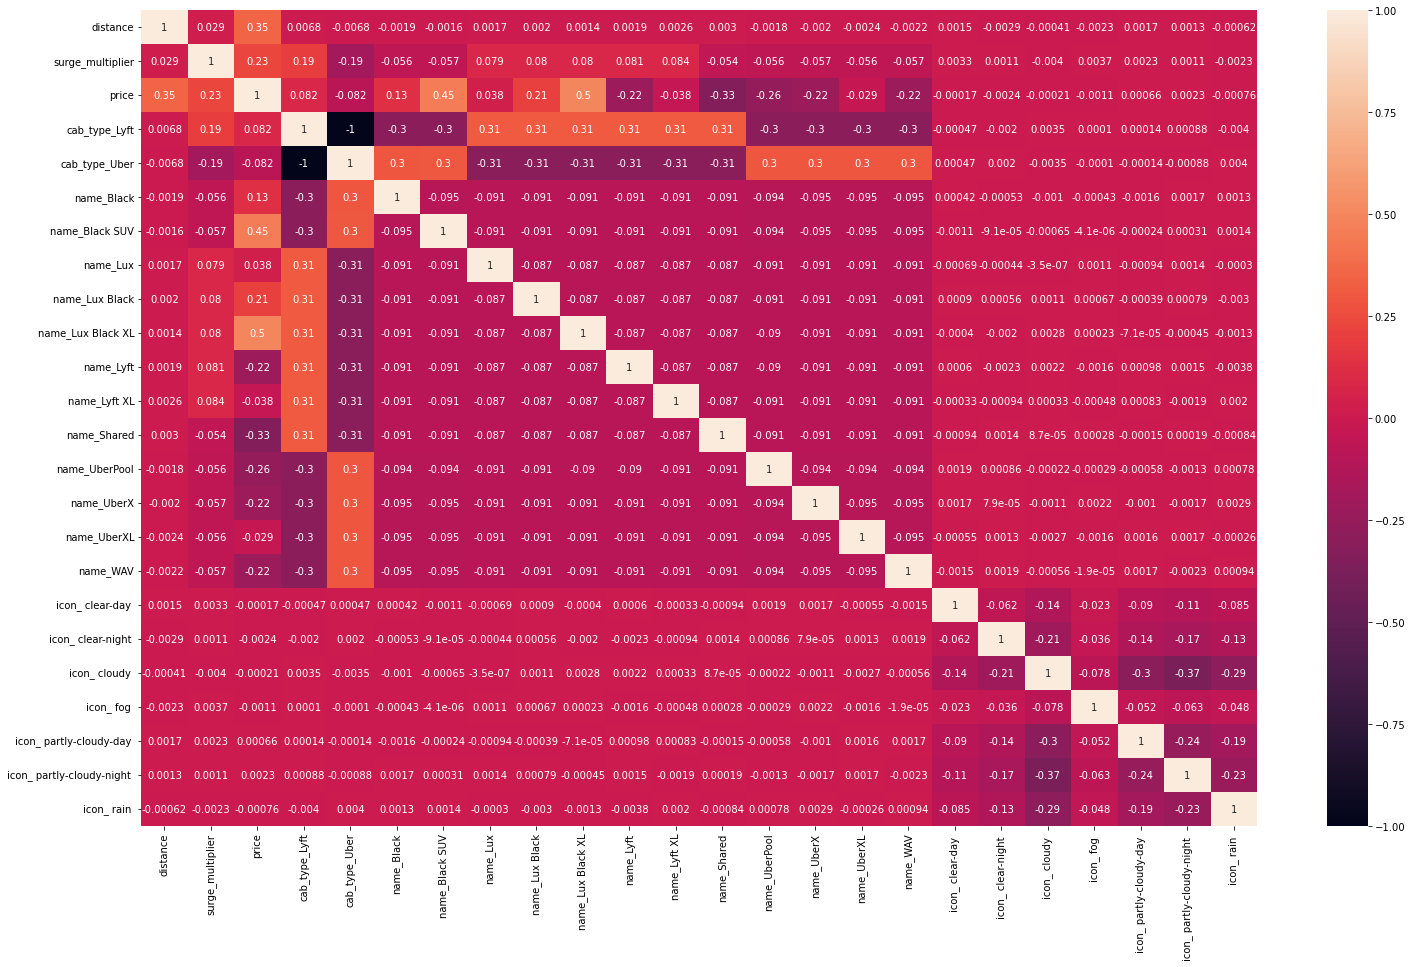

In [89]:
fig,ax = plt.subplots(figsize=[25,15])

corr = Uber_Lyft_Cleaned.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

As has been done to check the correlation on numerical data, this is also done to see the correlation value between features and targets. Based on the above, we can see that the high correlation values ​​are found in `distance`, `surge_multiplier`, `cab_type_Lyft`,`cab_type_Uber`, `name_Black`, `name_Black SUV`,
`name_Lux`, `name_Lux Black`, `name_Lux Black XL`, `name_Lyft`, `name_Lyft XL`, `name_Shared`,
`name_UberPool`, `name_UberX`, `name_UberXL`, `name_WAV` against `price` so we will use these features in the next modeling and drop other features

In [90]:
Uber_Lyft_Cleaned[['distance', 'surge_multiplier', 'cab_type_Lyft','cab_type_Uber', 'name_Black', 'name_Black SUV', 
'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared', 
'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV', 'price']].head()

,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,price
0,1.41,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.0
1,4.48,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.0
2,2.58,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
3,4.27,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0
4,2.62,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.5


After doing the above, then we will do feature scaling which aims to equalize the scale of the data between other features

In [91]:
# numerical scaling

num_col = ['distance', 'surge_multiplier']
scaler = StandardScaler()

num_scaled = pd.DataFrame(scaler.fit_transform(Uber_Lyft_Cleaned[num_col]))
num_scaled.columns = num_col

Uber_Lyft_Cleaned.drop(num_col, axis=1, inplace=True)
Uber_Lyft_Cleaned = pd.concat([Uber_Lyft_Cleaned, num_scaled], axis=1)

Uber_Lyft_Cleaned = Uber_Lyft_Cleaned[['distance', 'surge_multiplier', 'cab_type_Lyft','cab_type_Uber', 'name_Black', 'name_Black SUV', 
'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared', 
'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV', 'price']]

1. Outlier handling in each column with capping method or winsorizer
2. Using One Hot Encoding method to `cab_type`, `name`, and `icon` columns
3. Feature Selection -> `distance`, `surge_multiplier`, `cab_type_Lyft`,`cab_type_Uber`, `name_Black`, `name_Black SUV`, 
`name_Lux`, `name_Lux Black`, `name_Lux Black XL`, `name_Lyft`, `name_Lyft XL`, `name_Shared`, 
`name_UberPool`, `name_UberX`, `name_UberXL`, `name_WAV`
4. Scaling on numerical features

## VIII. Data Preprocessing

1. Outlier handling in each column with capping method or winsorizer
2. Using One Hot Encoding method to `cab_type`, `name`, and `icon` columns
3. Feature Selection -> `distance`, `surge_multiplier`, `cab_type_Lyft`,`cab_type_Uber`, `name_Black`, `name_Black SUV`, 
`name_Lux`, `name_Lux Black`, `name_Lux Black XL`, `name_Lyft`, `name_Lyft XL`, `name_Shared`, 
`name_UberPool`, `name_UberX`, `name_UberXL`, `name_WAV`
4. Scaling on numerical features

Next we will do testing modeling on the test data that we have separated at the beginning. From handling outliers to feature scaling

In [92]:
testing = pd.concat([X_test, y_test], axis=1)
testing.head()

,cab_type,name,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
179377,Lyft,Lyft XL,1.39,1.0,46.78,43.89,0.0342,1.00,0.96,5.89,8.48,2.030,rain,45.59,1008.80,120,1.0,1,280.3,0.86,0.0916,11.0
395451,Lyft,Lux,1.75,1.0,43.03,36.79,0.0674,1.00,0.93,11.62,12.67,2.642,rain,41.15,996.34,65,1.0,0,286.9,0.68,0.1064,16.5
132816,Uber,Black SUV,1.92,1.0,45.84,43.00,0.0000,0.00,0.92,5.52,7.33,9.856,cloudy,43.75,1022.31,220,1.0,0,298.3,0.27,0.0074,24.0
619912,Lyft,Lux,1.74,1.0,42.01,37.66,0.0015,0.32,0.91,6.82,7.56,4.394,cloudy,39.68,988.30,237,1.0,1,329.4,0.68,0.1430,16.5
133434,Uber,UberX,2.66,1.0,40.10,35.60,0.0000,0.00,0.73,6.44,8.22,10.000,cloudy,32.24,1022.84,60,1.0,0,308.8,0.30,0.1252,14.0


In [93]:
num_target = num_col + ['price']

print(num_target)
print(cat_col)

['distance', 'surge_multiplier', 'price']
['cab_type', 'name', 'icon']


In [94]:
# capping outlier
testing = wins.transform(testing)
testing.head()

,cab_type,name,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
179377,Lyft,Lyft XL,1.39,1.0,46.78,43.89,0.0342,1.00,0.96,5.89,8.48,2.030,rain,45.59,1008.80,120,1.0,1,280.3,0.86,0.0916,11.0
395451,Lyft,Lux,1.75,1.0,43.03,36.79,0.0674,1.00,0.93,11.62,12.67,2.642,rain,41.15,996.34,65,1.0,0,286.9,0.68,0.1064,16.5
132816,Uber,Black SUV,1.92,1.0,45.84,43.00,0.0000,0.00,0.92,5.52,7.33,9.856,cloudy,43.75,1022.31,220,1.0,0,298.3,0.27,0.0074,24.0
619912,Lyft,Lux,1.74,1.0,42.01,37.66,0.0015,0.32,0.91,6.82,7.56,4.394,cloudy,39.68,988.30,237,1.0,1,329.4,0.68,0.1430,16.5
133434,Uber,UberX,2.66,1.0,40.10,35.60,0.0000,0.00,0.73,6.44,8.22,10.000,cloudy,32.24,1022.84,60,1.0,0,308.8,0.30,0.1252,14.0


In [95]:
cat_ohe = pd.DataFrame(ohe_enc.transform(testing[['cab_type', 'name', 'icon']]))
cat_ohe.columns = ohe_enc.get_feature_names(['cab_type', 'name', 'icon'])

review = pd.concat([testing[['cab_type', 'name', 'icon']].reset_index(drop=True), cat_ohe], axis=1)
review.head()

,cab_type,name,icon,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,Lyft,Lyft XL,rain,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Lyft,Lux,rain,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Uber,Black SUV,cloudy,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Lyft,Lux,cloudy,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Uber,UberX,cloudy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [96]:
testing_cleaned = pd.concat([testing[num_target].reset_index(drop=True), cat_ohe], axis=1)
testing_cleaned = testing_cleaned[['distance', 'surge_multiplier', 'cab_type_Lyft','cab_type_Uber', 'name_Black', 'name_Black SUV', 
'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared', 
'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV', 'price']]

testing_cleaned.head()

,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,price
0,1.39,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0
1,1.75,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.5
2,1.92,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
3,1.74,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.5
4,2.66,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14.0


In [97]:
# numerical scaling

num_col = ['distance', 'surge_multiplier']

num_scaled = pd.DataFrame(scaler.transform(testing_cleaned[num_col]))
num_scaled.columns = num_col

testing_cleaned.drop(num_col, axis=1, inplace=True)
testing_cleaned = pd.concat([testing_cleaned, num_scaled], axis=1)
testing_cleaned = testing_cleaned[['distance', 'surge_multiplier', 'cab_type_Lyft', 'cab_type_Uber', 'name_Black',
                                'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft',
                                'name_Lyft XL', 'name_Shared', 'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV',
                                'price']]
testing_cleaned.head()

,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,price
0,-0.718100,-0.183727,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0
1,-0.391831,-0.183727,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.5
2,-0.237759,-0.183727,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
3,-0.400894,-0.183727,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.5
4,0.432906,-0.183727,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14.0


In [98]:
Uber_Lyft_Cleaned.head()

,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,price
0,-0.699974,-0.183727,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.0
1,2.082379,-0.183727,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.0
2,0.360402,-0.183727,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
3,1.892055,-0.183727,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0
4,0.396654,-0.183727,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.5


In [99]:
X_train = Uber_Lyft_Cleaned.drop('price',axis=1).copy()
y_train = Uber_Lyft_Cleaned['price']

X_test = testing_cleaned.drop('price',axis=1).copy()
y_test = testing_cleaned['price']

## IX. MODEL TRAINING

Define a linear regression model and assign it to a new variable

In [100]:
# linear regression
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

pred_train = lin_reg.predict(X_train)
pred_test = lin_reg.predict(X_test)

## X. MODEL EVALUATION

In [101]:
print('train: ', mean_absolute_error(y_train, pred_train))
print('test: ', mean_absolute_error(y_test, pred_test))

train:  1.8217807542542674
test:  1.8846171506809326


In [102]:
print('R2 Score: ', r2_score(y_test, pred_test))

R2 Score:  0.9072402276293209


Based on this we have some results from the models that have been used. `Mean Absolute Error` at 1.82 & 1.88 which means we have 1.82 error in predicting our price. Let's say we have data that costs ``10`' dollars. Our model will predict prices in the `8` or `12` dollar range.

Then we have some fairly good `R2 Score` (coefficient of determination) which means that our data fits our regression model quite well with identical scores i.e. `0.9`

## XI. MODEL INFERENCE

In this session, the same thing was done when processing data in the previous session, such as handling outliers to feature selection

In [103]:
inference

,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax
105826,Lyft,Lyft XL,22.5,4.12,1.00,38.54,36.11,0.0308,1.0,0.93,3.53,3.98,4.421,rain,36.81,1019.41,124,1.00,0,271.2,0.86,0.0894
242165,Uber,UberPool,14.5,7.46,1.00,37.92,31.91,0.0000,0.0,0.71,8.28,12.43,9.981,partly-cloudy-night,29.42,997.37,305,0.75,0,348.9,0.72,0.0000
655567,Lyft,Lyft,13.5,3.02,1.25,41.24,35.90,0.0000,0.0,0.60,8.39,12.38,10.000,partly-cloudy-day,28.42,991.46,297,0.74,1,351.9,0.72,0.0000


In [104]:
# capping outlier
inf = wins.transform(inference)
inf.head()

,cab_type,name,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
105826,Lyft,Lyft XL,4.12,1.00,38.54,36.11,0.0308,1.0,0.93,3.53,3.98,4.421,rain,36.81,1019.41,124,1.00,0,271.2,0.86,0.0894,22.5
242165,Uber,UberPool,7.46,1.00,37.92,31.91,0.0000,0.0,0.71,8.28,12.43,9.981,partly-cloudy-night,29.42,997.37,305,0.75,0,348.9,0.72,0.0000,14.5
655567,Lyft,Lyft,3.02,1.25,41.24,35.90,0.0000,0.0,0.60,8.39,12.38,10.000,partly-cloudy-day,28.42,991.46,297,0.74,1,351.9,0.72,0.0000,13.5


In [105]:
# OHE
cat_ohe = pd.DataFrame(ohe_enc.transform(inf[['cab_type', 'name', 'icon']]))
cat_ohe.columns = ohe_enc.get_feature_names(['cab_type', 'name', 'icon'])

review = pd.concat([inf[['cab_type', 'name', 'icon']].reset_index(drop=True), cat_ohe], axis=1)
review.head()

,cab_type,name,icon,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,Lyft,Lyft XL,rain,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Uber,UberPool,partly-cloudy-night,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Lyft,Lyft,partly-cloudy-day,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [106]:
inf_cleaned = pd.concat([inf[num_target].reset_index(drop=True), cat_ohe], axis=1)
inf_cleaned = inf_cleaned[['distance', 'surge_multiplier', 'cab_type_Lyft','cab_type_Uber', 'name_Black', 'name_Black SUV', 
'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared', 
'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV', 'price']]
                
# numerical scaling

num_col = ['distance', 'surge_multiplier']

num_scaled = pd.DataFrame(scaler.transform(inf_cleaned[num_col]))
num_scaled.columns = num_col

inf_cleaned.drop(num_col, axis=1, inplace=True)
inf_cleaned = pd.concat([inf_cleaned, num_scaled], axis=1)

inf_cleaned = inf_cleaned[['distance', 'surge_multiplier', 'cab_type_Lyft','cab_type_Uber', 'name_Black', 'name_Black SUV', 
'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared', 
'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV', 'price']]

inf_cleaned.head()

,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,price
0,1.756110,-0.183727,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,22.5
1,4.783165,-0.183727,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,14.5
2,0.759175,4.894679,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.5


In [107]:
inf_cleaned.shape

(3, 17)

In [108]:
X_inf = inf_cleaned.drop('price',axis=1).copy()

In [109]:
y_pred_inf = lin_reg.predict(X_inf)
y_pred_inf

array([20.17285156, 24.03515625, 19.3359375 ])

## Conclusions
### Based on the above objectives that want Uber-Lyft Price Prediction, so we can make some conclusions:

```text
1) The results shown in the evaluation of our model are:

    - `Mean Absolute Error` at 1.82 & 1.88 which means we have 1.82 error in predicting our price. Let's say we have data that costs ``10`' dollars. Our model will predict prices in the `8` or `12` dollar range.

    - Then we have some fairly good `R2 Score` (coefficient of determination) which means that our data fits our regression model quite well with identical scores i.e. `0.9`

2) On our model inference, we can predict the given sample price for our model. Even though the predicted price is not accurate, we can prove that our model can be used to predict it
```

## Conceptual Problems


1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !

Pengabaian dari beberapa asumsi yang bukan asumsi dasar ini tentunya mengakibatkan resiko-resiko tertentu. Sebagai resiko ketika salah satu asumsi tidak terpenuhi adalah model regresi menjadi kurang dapat diandalkan. Namun tidak berarti tidak bisa digunakan. Sebaliknya jika semua asumsi terpenuhi maka model regresi tersebut bisa sangat powerfull untuk digunakan.
Berikut ini asumsi-asumsi model regresi yang saya sampaikan secara singkat:

`Asumsi Regresi ke 1`:
Untuk setiap nilai X, ada nilai Y yang sesuai. Karena analisis regresi merupakan analisis sampel berpasangan jadi setiap nilai Y pada satu sampel selalu ada nilai X.

`Asumsi Regresi ke 2`:
Nilai-nilai variabel Y harus distribusi normal. Bila tidak terdistribusi normal ada pengembangan model regresi lain misalnya model regresi logit, probit atau tobit.

`Asumsi Regresi ke 3`:
Jumlah pengamatan harus lebih besar dari jumlah variabelnya. Jika jumlah variabel ada 3 maka jumlah pengamatan atau sampel minimal adalah 4. Ini dapat diamati secara langsung dengan melihat data, tanpa melakukan pengujian.

`Asumsi Regresi ke 4`:
Variabilitas nilai X adalah positif. Ini berarti nilai-nilai X dalam sampel yang digunakan tidak boleh semuanya sama atau hampir sama. Cara melihatnya dengan melihat nilai varians setiap variabel.

`Asumsi Regresi ke 5`:
Model regresi ditentukan dengan benar. Ini berarti bahwa jika variabel Y dan X memiliki hubungan terbalik, persamaan model harus ditentukan dengan tepat:

`Asumsi Regresi ke 6`:
Parameter model regresi adalah linier. Contoh persamaan model yang linear dalam parameter
**Y = a + b1X1 + b2X2 + e**
Meskipun, X2 dinaikkan sampai dua kali, persamaannya masih linear dalam parameter beta. Jadi asumsi terpenuhi.

`Asumsi Regresi ke 7`:
Rata-rata residu adalah nol. Bagaimana cara mengeceknya? Periksa rata-rata residu. Jika nol atau sangat dekat dengan 0, maka asumsi ini terpenuhi.

`Asumsi Regresi ke 8`:
Homoscedasticity residual, yaitu semua gangguan atau residual dalam fungsi regresi memiliki varians yang sama atau tidak terjadi heteroskedastik. 

`Asumsi Regresi ke 9`:
Tidak ada autokorelasi residu (VIF). 

`Asumsi Regresi ke 10`:
Tidak ada multikolinieritas sempurna. Tidak ada hubungan linear yang sempurna di antara variabel penjelas (independen). Terjadinya multikolinieritas dapat kita deteksi melalui hal-hal berikut:
Nilai R2 yang tinggi, tetapi sebagian besar variabel independen secara parsial tidak memiliki pengaruh signifikan terhadap variabel dependen

`Asumsi Regresi ke 11`
Normalitas residu, dimana residu harus didistribusikan secara normal. 

`Asumsi Regresi ke 12`:
Variabel X dan residu tidak berkorelasi.

refrence: https://maglearning.id/2019/05/26/asumsi-asumsi-model-persamaan-regresi-linier/

2. Tunjukkan dan tafsirkan arti dari coefficient dan slope yang didapat dari model yang telah Anda bangun !



In [110]:
print('Coefficient : ' + str(lin_reg.coef_))
print('Intercept : ' + str(lin_reg.intercept_))

Coefficient : [ 3.18978285e+00  1.58471970e+00 -3.17187529e+12  2.43245724e+12
 -6.86355565e+12 -6.86355565e+12 -1.25922313e+12 -1.25922313e+12
 -1.25922313e+12 -1.25922313e+12 -1.25922313e+12 -1.25922313e+12
 -6.86355565e+12 -6.86355565e+12 -6.86355565e+12 -6.86355565e+12]
Intercept : 4431098413258.297


Slope is interpreted as an increase in target value every increse in feature value. based on the coefficients found, increse in surge multiplier affects price value the most compared to other features.This is logically sound because surge multiplier should increased the price of rideshare order as it increase.

Intercept is a constant value thet shows the adjustment added to every target value. the inretcept value shows a constant decrease of value in the the model.

reference: https://online.stat.psu.edu/stat500/book/export/html/604